# EN.553.436/646 Homework 2
Follow these submission guidelines or your answers may not be graded:
1. Your PDF should be legible.
2. No code or comment should go outside the margins of your PDF.
3. Your PDF should contain page breaks.
4. Your problems should be marked in Gradescope.

## 1 (10 pts.)
1. (5 pts.) Import [`water.csv`](https://www.kaggle.com/adityakadiwal/water-potability?select=water_potability.csv) as a `pandas` `DataFrame`. Drop all rows with `NaN`. Store `potability` as target variable `y` and the other variables as predictors `X`. 
2. (5 pts.) Apply `sklearn.preprocessing.StandardScalar` to the predictors. Using `sklearn.model_selection.train_test_split` split the data into training and test sets `X_train, X_test, y_train, y_test` with 20% test size and `random_state=553`.

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

water = pd.read_csv('water.csv')
water = water.dropna()
X = water.drop(['Potability'],axis=1)
y = water['Potability']
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=553)

## 2  (10 pts.)
1. (5 pts.) Manually implement linear discriminant analysis on the training data using `numpy`. Assume flat priors. 
2. (5 pts.) Print the test accuracy from your implementation of flat-prior LDA versus the test accuracy from the `sklearn.discriminant_analysis.LinearDiscriminantAnalysis` implementation of flat-prior LDA. The accuracies should be the same.

In [2]:
import numpy as np

Sig = np.cov(X_train, rowvar=False)
ind0 = np.where(y_train == 0)
ind1 = np.where(y_train == 1)
mu0 = X_train[ind0].mean(axis=0)
mu1 = X_train[ind1].mean(axis=0)
w = np.linalg.inv(Sig) @ (mu1 - mu0)
c = np.dot(w, 0.50 * (mu1 + mu0))

def lda_pred(x):
    return int(np.dot(w, x) > c)

def lda_score(X_test, y_test):
    pred = np.apply_along_axis(lda_pred, 1, X_test)
    return np.mean(pred == y_test)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis(priors=[0.50, 0.50])
clf.fit(X_train, y_train)
LinearDiscriminantAnalysis()
print('My LDA:', lda_score(X_test, y_test))
print('sklearn:', clf.score(X_test, y_test))

My LDA: 0.5136476426799007
sklearn: 0.5136476426799007


## 3  (10 pts.)

1. (5 pts.) Plot the mean 10-fold CV scores on the training set of $k\text{NN}$ models for $k \in [1, 2, \ldots, 10, 20, \ldots, 200]$. Make sure that your data are shuffled for the CV using `random_state=553`, and make sure CV is run on the same data partition for each $k$. 
2. (5 pts.) Explain the trend of your plot in one to three sentences. An explanation that is too vague will not receive full credit.

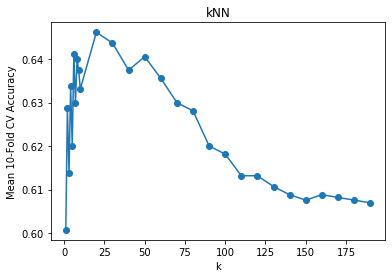

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

acc =[]
rng = list(range(1, 10)) + list(range(10, 200, 10))
# Either KFold accepted.
# kf = KFold(n_splits=10, shuffle=True, random_state=553)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=553)

for k in rng:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_acc = np.mean(cross_val_score(knn, X_train, y_train, cv=kf))
    acc.append(cv_acc)
    
plt.plot(rng, acc, "-o")
plt.xlabel('k')
plt.ylabel('Mean 10-Fold CV Accuracy')
plt.title('kNN')
plt.show()

### Explanation:
The accuracy increases to an optimal level, then decreases towards the mean proportion of the majority class in the CV test sets. The majority of neighbors tend to belong to that class when considering a wide enough number of neighbors.

## 4  (10 pts.)
1. (5 pts.) Repeat part 3.1 for a random forest model, varying `n_estimators` in $[1, 2, \ldots, 10, 20, \ldots, 100]$. Set `random_state=636` for the random forest. 
2. (5 pts.) Explain the trend of your plot in one to three sentences. An explanation that is too vague will not receive full credit.

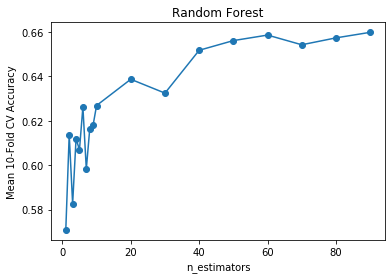

In [4]:
from sklearn.ensemble import RandomForestClassifier

acc =[]
rng = list(range(1, 10)) + list(range(10, 100, 10))
# Either KFold accepted.
# kf = KFold(n_splits=10, shuffle=True, random_state=553)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=553)

for n in rng:
    rfc = RandomForestClassifier(n_estimators=n, random_state=636)
    cv_acc = np.mean(cross_val_score(rfc, X_train, y_train, cv=kf))
    acc.append(cv_acc)
    
plt.plot(rng, acc, "-o")
plt.xlabel('n_estimators')
plt.ylabel('Mean 10-Fold CV Accuracy')
plt.title('Random Forest')
plt.show()

### Explanation:
Accuracy increases initially because averaging predictions from a larger number of decision trees reduces overfitting during training. Accuracy then converges because the the average of the prediction functions approaches an expected value.